## Model Selection & Evaluation

<hr>

### Agenda
1. Cross Validation 
2. Hyperparameter Tuning  
3. Model Evaluation 
4. Model Persistance 
5. Validation Curves
6. Learning Curves

<hr>

### 1. Cross Validation
* Simple models underfit.
* Accuracy for training data & validation data is not much different.
* But, accurcy ain't that great.
* This situation is of low variance & high bias
* On moving towards complex models, accuracy improves.
* But, gap between accuracy on training data & validation data increases
* This situation is of high variance & low bias

<img src="https://www.researchgate.net/profile/Ljubomir_Jacic2/post/How_does_model_complexity_impact_the_bias-variance_tradeoff/attachment/59d6233579197b807798188f/AS%3A306150770184192%401450003439733/image/biasvariance.png" width="400px">

* We need to compare across models to find the best model.
* We need to compare across all hyper-parameters for a particular model.
* The data that is used for training should not be used for validation. 
* The validation accuracy is the one that we claims

In [1]:
from sklearn.tree import DecisionTreeClassifier

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

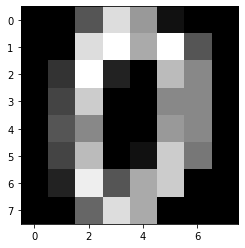

In [5]:
plt.imshow(digits.images[0],cmap='gray')

In [6]:
dt = DecisionTreeClassifier(max_depth=10)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
trainX, testX, trainY, testY = train_test_split(digits.data, digits.target)

In [9]:
dt.fit(trainX,trainY)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
dt.score(testX,testY)

0.8755555555555555

In [11]:
dt.score(trainX,trainY)

0.9844097995545658

* Decreasing the complexity of model

In [16]:
dt = DecisionTreeClassifier(max_depth=6)

In [17]:
dt.fit(trainX,trainY)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
dt.score(testX,testY)

0.7911111111111111

In [19]:
dt.score(trainX,trainY)

0.8292501855976243

* Observation : With decrease in complexity the gap in training & validation accuracy also decreased

#### Cross Validation API
* Splits data into k parts.
* Use k - 1 parts for training the model
* Use kth part for validation
* Repeat the above steps multiple times to get a genralized behaviour

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
scores = cross_val_score(dt, digits.data, digits.target, cv =5)

In [22]:
scores

array([0.73055556, 0.59444444, 0.75487465, 0.77715877, 0.72980501])

In [23]:
scores.mean()

0.7173676880222841

#### Cross-validate Function : Scores for multiple matrices

In [24]:
from sklearn.model_selection import cross_validate

In [25]:
scoring = ['precision_macro', 'recall_macro', 'accuracy']

In [26]:
cross_validate(dt, digits.data, digits.target, scoring=scoring, cv=5)

{'fit_time': array([0.01785231, 0.01303697, 0.01365185, 0.01375127, 0.01343083]),
 'score_time': array([0.00224018, 0.00194097, 0.00203419, 0.00210786, 0.00202417]),
 'test_accuracy': array([0.73333333, 0.59444444, 0.75208914, 0.77715877, 0.73259053]),
 'test_precision_macro': array([0.74044301, 0.67155916, 0.76103393, 0.80504154, 0.74741343]),
 'test_recall_macro': array([0.73374946, 0.59483483, 0.75084917, 0.77526169, 0.73382239])}

#### Stratification for dealing with imbalanced Classes
* StratifiedKFold 
  - Class frequencies are preserved in data splitting

In [27]:
import numpy as np

In [28]:
Y = np.append(np.ones(12),np.zeros(6))

In [31]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0.])

In [29]:
X = np.ones((18,3))

In [30]:
X

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [32]:
from sklearn.model_selection import StratifiedKFold

In [33]:
skf = StratifiedKFold(n_splits=3)

In [34]:
list(skf.split(X,Y))

[(array([ 4,  5,  6,  7,  8,  9, 10, 11, 14, 15, 16, 17]),
  array([ 0,  1,  2,  3, 12, 13])),
 (array([ 0,  1,  2,  3,  8,  9, 10, 11, 12, 13, 16, 17]),
  array([ 4,  5,  6,  7, 14, 15])),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7, 12, 13, 14, 15]),
  array([ 8,  9, 10, 11, 16, 17]))]

In [35]:
Y[[ 4,  5,  6,  7,  8,  9, 10, 11, 14, 15, 16, 17]]

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.])

### 2. Hyperparameter Tuning
* Model parameters are learnt by learning algorithms based on data
* Hyper-parameters needs to be configured
* Hyper-parameters are data dependent & many times need experiments to find the best
* sklearn provides GridSerach for finding the best hyper-parameters

##### Exhaustive GridSearch
* Searches sequentially for all the configued params
* For all possible combinations

In [36]:
trainX, testX, trainY, testY = train_test_split(digits.data, digits.target)

In [37]:
dt = DecisionTreeClassifier()

In [38]:
from sklearn.model_selection import GridSearchCV

In [47]:
grid_search = GridSearchCV(dt, param_grid={'max_depth':range(5,30,5),'min_samples_split':[2,3,4,5]}, cv=5)

In [48]:
grid_search.fit(digits.data,digits.target)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(5, 30, 5),
                       

In [49]:
grid_search.best_params_

{'max_depth': 25, 'min_samples_split': 2}

In [50]:
grid_search.cv_results_

{'mean_fit_time': array([0.01248059, 0.01143117, 0.01142502, 0.01174722, 0.01849232,
        0.01877098, 0.01856046, 0.01839175, 0.02049923, 0.01921287,
        0.01926908, 0.01900921, 0.01934438, 0.01922073, 0.01876335,
        0.01862254, 0.0189445 , 0.0190002 , 0.01937022, 0.01861882]),
 'mean_score_time': array([0.00054879, 0.00048852, 0.00051394, 0.00068016, 0.00073972,
        0.00075841, 0.00077653, 0.00075135, 0.00082703, 0.0007431 ,
        0.00075326, 0.00074415, 0.00076709, 0.00062175, 0.00055857,
        0.00056376, 0.00055933, 0.00057883, 0.00063095, 0.00055079]),
 'mean_test_score': array([0.62946301, 0.63224234, 0.62890282, 0.62611421, 0.79023677,
        0.7846905 , 0.78190498, 0.78690498, 0.78134169, 0.77578149,
        0.78523986, 0.7830099 , 0.78746982, 0.78802847, 0.7796874 ,
        0.778013  , 0.79358403, 0.77745899, 0.78412875, 0.7768926 ]),
 'param_max_depth': masked_array(data=[5, 5, 5, 5, 10, 10, 10, 10, 15, 15, 15, 15, 20, 20, 20,
                    20, 25, 

In [51]:
grid_search.best_score_

0.7935840297121635

In [52]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=25, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### RandomizedSearch
* Unlike GridSearch, not all parameters are tried & tested
* But rather a fixed number of parameter settings is sampled from the specified distributions.

##### Comparing GridSearch and RandomSearchCV

In [53]:
from time import time

#randint is an intertor for generating numbers between range specified
from scipy.stats import randint

In [54]:
X = digits.data
Y = digits.target

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [56]:
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3,5,7, None],
              "max_features": randint(1,11),
              "min_samples_split": randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [57]:
param_dist

{'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_depth': [3, 5, 7, None],
 'max_features': <scipy.stats._distn_infrastructure.rv_frozen at 0x7ffb79644450>,
 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen at 0x7ffb79644490>}

In [58]:
rf = RandomForestClassifier(n_estimators=20)

In [59]:
n_iter_search = 20
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5)

start = time()
random_search.fit(X, Y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))

RandomizedSearchCV took 5.39 seconds for 20 candidates parameter settings.


In [60]:
random_search.best_score_

0.9209935004642524

In [61]:
param_grid = {"max_depth": [3,5,7,None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)
start = time()
grid_search.fit(X, Y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))

GridSearchCV took 41.02 seconds for 144 candidate parameter settings.


In [62]:
grid_search.best_score_

0.934910244506345

In [64]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
grid_search.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 10,
 'min_samples_split': 3}

* GridSearch & RandomizedSearch can fine tune hyper-parameters of transformers as well when part of pipeline

### 3. Model Evaluation
* Three different ways to evaluate quality of model prediction
  - score method of estimators, a default method is configured .i.e r2_score for regression, accuracy for classification
  - Model evalutaion tools like cross_validate or cross_val_score also returns accuracy
  - Metrices module is rich with various prediction error calculation techniques

In [66]:
trainX, testX, trainY, testY = train_test_split(X,Y)

In [67]:
rf.fit(trainX, trainY)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

* Technique 1 - Using score function

In [68]:
rf.score(testX,testY)

0.9711111111111111

* Technique 2 - Using cross_val_score as discussed above

In [76]:
cv_score =cross_val_score(rf,X,Y,cv=5)

In [77]:
cv_score.mean()

0.926573816155989

#### Cancer prediction sample for understanding metrices

In [78]:
from sklearn.datasets import load_breast_cancer

In [79]:
dt = DecisionTreeClassifier()

In [80]:
cancer_data = load_breast_cancer()

In [81]:
trainX, testX, trainY, testY = train_test_split(cancer_data.data, cancer_data.target)

In [82]:
dt.fit(trainX,trainY)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [83]:
pred = dt.predict(testX)

#### Technique 3 - Using metrices
##### Classfication metrices
* Accuracy Score - Correct classification vs ( Correct classification + Incorrect Classification )

In [84]:
from sklearn import metrics

In [85]:
metrics.accuracy_score(y_pred=pred, y_true=testY)

0.951048951048951

* Confusion Matrix - Shows details of classification inclusing TP,FP,TN,FN
  - True Positive (TP), Actual class is 1 & prediction is also 1
  - True Negative (TN), Actual class is 0 & prediction is also 0
  - False Positive (FP), Acutal class is 0 & prediction is 1
  - False Negative (FN), Actual class is 1 & prediction is 0

In [86]:
metrics.confusion_matrix(y_pred=pred, y_true=testY, labels=[0,1])

array([[49,  4],
       [ 3, 87]])

* Precision Score
  - Ability of a classifier not to label positive if the sample is negative
  - Claculated as TP/(TP+FP)
  - We don't want a non-spam mail to be marked as spam

In [87]:
metrics.precision_score(y_pred=pred, y_true=testY)

0.9560439560439561

* Recall Score
  - Ability of classifier to find all positive samples
  - It's ok to predict patient tumor to be cancer so that it undergoes more test
  - But it is not ok to miss a cancer patient without further analysis

In [88]:
metrics.recall_score(y_pred=pred, y_true=testY)

0.9666666666666667

* F1 score
  - Weighted average of precision & recall

In [89]:
metrics.f1_score(y_pred=pred, y_true=testY)

0.9613259668508287

* ROC & AUC 

##### House Price Prediction - Understanding matrices

In [90]:
from sklearn.datasets import california_housing

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.california_housing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [91]:
house_data = california_housing.fetch_california_housing()

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
lr = LinearRegression()

In [94]:
lr.fit(house_data.data, house_data.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
pred = lr.predict(house_data.data)

#### Matrices for Regression
* mean squared error
  - Sum of squares of difference between expected value & actual value

In [96]:
metrics.mean_squared_error(y_pred=pred, y_true=house_data.target)

0.5243209861846072

* mean absolute error
  - Sum of abs of difference between expected value & actual value

In [97]:
metrics.mean_absolute_error(y_pred=pred, y_true=house_data.target)

0.5311643817546463

* r2 score
  - Returns accuracy of model in the scale of 0 & 1
  - It measures goodness of fit for regression models
  - Calculated as =  (variance explained by the model)/(Total variance)
  - High r2 means target is close to prediction
  
  
  <img src="https://github.com/awantik/machine-learning-slides/blob/master/Capture.PNG?raw=true" width="400px">

In [98]:
metrics.r2_score(y_pred=pred, y_true=house_data.target)

0.606232685199805

### Metrices for Clustering 
* Two forms of evaluation 
* supervised, which uses a ground truth class values for each sample.
  - completeness_score
  - homogeneity_score
* unsupervised, which measures the quality of model itself
  - silhoutte_score
  - calinski_harabaz_score

##### completeness_score
- A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.
- Accuracy is 1.0 if data belonging to same class belongs to same cluster, even if multiple classes belongs to same cluster

In [99]:
from sklearn.metrics.cluster import completeness_score

In [100]:
completeness_score( labels_true=[10,10,11,11],labels_pred=[1,1,0,0])

1.0

* The acuracy is 1.0 because all the data belonging to same class belongs to same cluster

In [101]:
completeness_score( labels_true=[11,22,22,11],labels_pred=[1,0,1,1])

0.3836885465963443

* The accuracy is .3 because class 1 - [11,22,11], class 2 - [22]  

In [103]:
print(completeness_score([10, 10, 11, 11], [0, 0, 0, 0]))

1.0


##### homogeneity_score
- A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.

In [104]:
from sklearn.metrics.cluster import homogeneity_score

In [106]:
homogeneity_score([6, 6, 7, 7], [1, 1, 0, 0])

1.0

In [107]:
homogeneity_score([0, 0, 1, 1], [0, 1, 2, 3])

0.9999999999999999

In [108]:
homogeneity_score([0, 0, 0, 0], [1, 1, 0, 0])

1.0

* Same class data is broken into two clusters

#### silhoutte_score
* The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample.
* The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.

##### Selecting the number of clusters with silhouette analysis on KMeans clustering

In [109]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

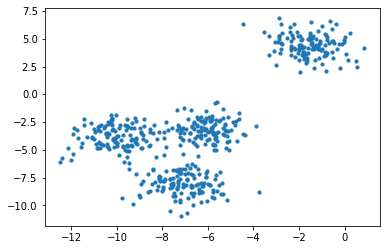

In [110]:
plt.scatter(X[:,0],X[:,1],s=10)

In [115]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12] #grid search

In [116]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [117]:
sillhoute_score_list = []
for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    print (n_cluster, silhouette_score(X,labels))
    sillhoute_score_list.append(silhouette_score(X,labels))

2 0.7049787496083262
3 0.5882004012129721
4 0.6505186632729437
5 0.5745566973301872
6 0.492060503278527
7 0.3823424634324862
8 0.32820299836466416
9 0.3363359643149454
10 0.3435766237020084
11 0.3381023362210598
12 0.3305356118251579


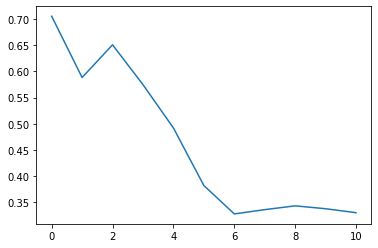

In [118]:
import matplotlib.pyplot as plt
plt.plot(sillhoute_score_list)
plt.show()

* The best number of clusters is 2

#### calinski_harabaz_score
* The score is defined as ratio between the within-cluster dispersion and the between-cluster dispersion.

In [121]:
from sklearn.metrics import calinski_harabasz_score

for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    print (n_cluster, calinski_harabasz_score(X,labels))

2 1604.112286409658
3 1809.991966958033
4 2704.4858735121097
5 2260.913962300916
6 2042.2761113632657
7 1888.860225496275
8 1852.2412307401876
9 1793.0330759563114
10 1758.7314705551196
11 1755.7411908271788
12 1758.903536901474


### 4. Model Persistance
* Model training is an expensive process
* It is desireable to save the model for future reuse
* using pickle & joblib this can be achieved

In [122]:
import pickle

In [123]:
s = pickle.dumps(dt)

In [124]:
type(s)

bytes

In [125]:
pickle.loads(s)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [126]:
type(s)

bytes

* joblib is better extension of pickle
* Doesn't convert into string

In [127]:
from sklearn.externals import joblib

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [128]:
joblib.dump(dt, 'dt.joblib')

['dt.joblib']

* Loading the file back into model

In [129]:
dt = joblib.load('dt.joblib')

In [130]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### 5. Validation Curves
* To validate a model, we need a scoring function.
* Create a grid of possible hyper-prameter configuration.
* Select the hyper-parameter which gives the best score

In [131]:
from sklearn.model_selection import validation_curve

param_range = np.arange(1, 50, 2)

train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             digits.data, 
                                             digits.target, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="accuracy", 
                                             n_jobs=-1)

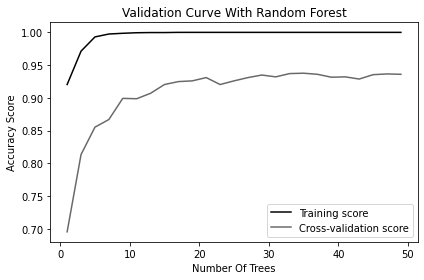

In [132]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()